# Julia for Economics Bootcamp

## Session 1: Julia Basics

### Cameron Pfiffer (cpfiffer@stanford.edu)

# Who am I?

My name is Cameron Pfiffer. I'm a visiting PhD student in finance from the University of Oregon. 

In my research, I mostly work on anything computational, so Bayesian methods, applied metrics, macroeconomics, etc. I really like computers.

# Why does anything I say mean anything?

I've been a core developer of Turing.jl and its sattelite packages for four years. Turing.jl is a package for probabilistic programming written in Julia. 

I've written oodles of Julia code and consider myself reasonably good at producing performant, idiomatic, and easily-read Julia code.

# What is this series?

I'm going to be presenting one workshop a week. Topics are tailored towards researchers who need to work with non-standard statistical methods or computational tools.

- Julia Basics (today)
- Parallelization for Economists (Februrary)
- Optimization and Automatic Differentiation (March)
- Performant Programming and Best Practices (April)
- Bayesian Inference and Probabilistic Programming (May)

**If there is something you want to know how to do, please contact me!**

# What is the structure of each session?

I will lecture on a specific concept for 10-15 minutes and then provide you small practice tasks to solidify your learning.

During the practice tasks, you will have access to breakout rooms of different interest levels according to how interested you are in completing the task:

- **Nerd** (gotta do it, want to be around others who are interested in completing the task)
- **Geek** (mildly interested, unphased if you don't complete it, more solo-work oriented)
- **Dork** (if you just want to disappear and not write any code)

At the end of each concept check I will bring everyone back together and go through an answer live.

We will have a ten minute break each hour, with a fifteen minute break at 10am.

At noon, I will provide you a small project that you should be able to accomplish within an hour. I will be available to provide guidance or suggestions and answer questions.

# House rules: Zoom

Since we are unfortunately limited to Zoom, I wanted to outline workshop behavior to make sure we have a productive class.

1. **Please speak up!** I am happy to be interrupted! 
2. If you don't want to speak up, **please put your questions in the chat**. Natalya will be available to answer smaller questions, or to relay them to me if they are more complex.

I prefer interactive classes!

# House rules: "stupid questions"

Do not start a sentence with "Maybe this is a stupid question, but..."

There are **literally zero stupid questions**. 

Programming is suffering and I'm here to make it palatable -- please please **PLEASE** ask me if you start to feel yourself get off track.

Best case scenario, everyone else is confused and asking the question solves a bunch of problems. 

Worst case scenario, you yourself become less confused and other people concretize their understandings as well!

# My manner of speech

When I am excited, like right now, I tend to 

- Talk fast
- Use idioms
- Use slang

and this can be difficult to follow for non-native English speakers.

Please let me know if I slip up!

# What are we doing today?

- What is Julia?
- How to install Julia
- How to write code in Julia
- Julia syntax 
    - Variables, operators, language primitives
    - Functions
    - Array types, broadcasting
    - Control flow, breaking bad habits from R/Stata/Matlab
    - Types
    - Julia's superpower, **multiple dispatch**!
- Core package tour
    - CSV and DataFrames (awesome data goon tools)
    - FixedEffectModels (fixed effects, clustering, IVs, etc.)
    - Visualization
- Maximum likelihood (time permitting)

# Questions before we start?

# Let's gooOoooOooooooOOOooo

![](https://media.giphy.com/media/q1kBdDry3xudsp0DDm/giphy.gif)

# Disclaimer!

- I am not a salesman
- Julia is one of many languages
- Julia just happens to be a great tool
- All languages are tools, use what works 
- I will not indulge in your Stata/R flame war because that's where we all lose
    - Stata does make me mad though so ask questions about it at your own risk
- Use Julia when (a) it is appropriate or (b) when you want to work with it

# What is Julia?

Julia is 

- Easy to learn, easy to write
- Hilariously fast if you write it correctly, but still fast if write it incorrectly
- Just-in-time compiled (JIT), though can be interpreted/AOT compiled
- Dynamically typed
- Highly reproducible across computing environments
- Composable (more on this later!)
- General purpose, but extremely good at scientific computing
- Open source! The best thing!
- Beautiful

# What Julia is NOT (yet)

- A smash-and-grab analysis tool (i.e. not a great replacement for random 1-second Python/R/Stata scripts)
- A place to find canned, ultra-robust, advanced (classical) statistical tools
    - Here I mean stuff like 3SLS, weirdo GMM, etc. You can do them but it's not a one-line call (yet).
    - SAS/Stata are very old and have some amazing stuff that is really, really well written!
    - If this is a need you have and you want it in Julia, reach out to me and I'll see what we can make happen.


# Demo

Let's see some common stuff you might do, starting with some basic stats.

In [1]:
using RegressionTables, DataFrames, FixedEffectModels, RDatasets

df = dataset("datasets", "iris")
df[!,:SpeciesDummy] = string.(df[!,:Species])

rr1 = reg(df, @formula(SepalLength ~ SepalWidth + fe(SpeciesDummy)))
rr2 = reg(df, @formula(SepalLength ~ SepalWidth + PetalLength + fe(SpeciesDummy)))
rr3 = reg(df, @formula(SepalLength ~ SepalWidth + PetalLength + PetalWidth + fe(SpeciesDummy)))
rr4 = reg(df, @formula(SepalWidth ~ SepalLength + PetalLength + PetalWidth + fe(SpeciesDummy)))

regtable(rr1,rr2,rr3,rr4; renderSettings = asciiOutput())


----------------------------------------------------------
                         SepalLength            SepalWidth
               ------------------------------   ----------
                    (1)        (2)        (3)          (4)
----------------------------------------------------------
SepalWidth     0.804***   0.432***   0.496***             
                (0.106)    (0.081)    (0.086)             
PetalLength               0.776***   0.829***      -0.188*
                           (0.064)    (0.069)      (0.083)
PetalWidth                            -0.315*     0.626***
                                      (0.151)      (0.123)
SepalLength                                       0.378***
                                                   (0.066)
----------------------------------------------------------
SpeciesDummy        Yes        Yes        Yes          Yes
----------------------------------------------------------
Estimator           OLS        OLS        OLS          

Maybe you want to do some Bayesian stuff instead:

In [2]:
using Turing, LinearAlgebra, StatsPlots

@model function flowers(data)
    α ~ Normal(4,1)
    β ~ Normal(0,1)
    s² ~ InverseGamma(2,3)
    data[:,:SepalLength] ~ MvNormal(α .+ β .* data[:,:SepalWidth], s²*I)
end

model = flowers(df)
chain = sample(model, NUTS(), MCMCSerial(), 2_000, 4; progress=false)

┌ Info: Found initial step size
│   ϵ = 0.00625
└ @ Turing.Inference /home/cpfiffer/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /home/cpfiffer/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.025
└ @ Turing.Inference /home/cpfiffer/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188
┌ Info: Found initial step size
│   ϵ = 0.0125
└ @ Turing.Inference /home/cpfiffer/.julia/packages/Turing/y0DW3/src/inference/hmc.jl:188


Chains MCMC chain (2000×15×4 Array{Float64, 3}):

Iterations        = 1001:1:3000
Number of chains  = 4
Samples per chain = 2000
Wall duration     = 25.06 seconds
Compute duration  = 21.82 seconds
parameters        = α, s², β
internals         = lp, n_steps, is_accept, acceptance_rate, log_density, hamiltonian_energy, hamiltonian_energy_error, max_hamiltonian_energy_error, tree_depth, numerical_error, step_size, nom_step_size

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat    ⋯
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64    ⋯

           α    6.0371    0.4439     0.0050    0.0100   2203.6204    1.0009    ⋯
           β   -0.0665    0.1443     0.0016    0.0033   2193.5717    1.0009    ⋯
          s²    0.7132    0.0825     0.0009    0.0014   3838.1699    1.0005    ⋯
                                                                1 column omitted

Quantiles
  parameters      2.5%     25.0%     50.0%     75.0%

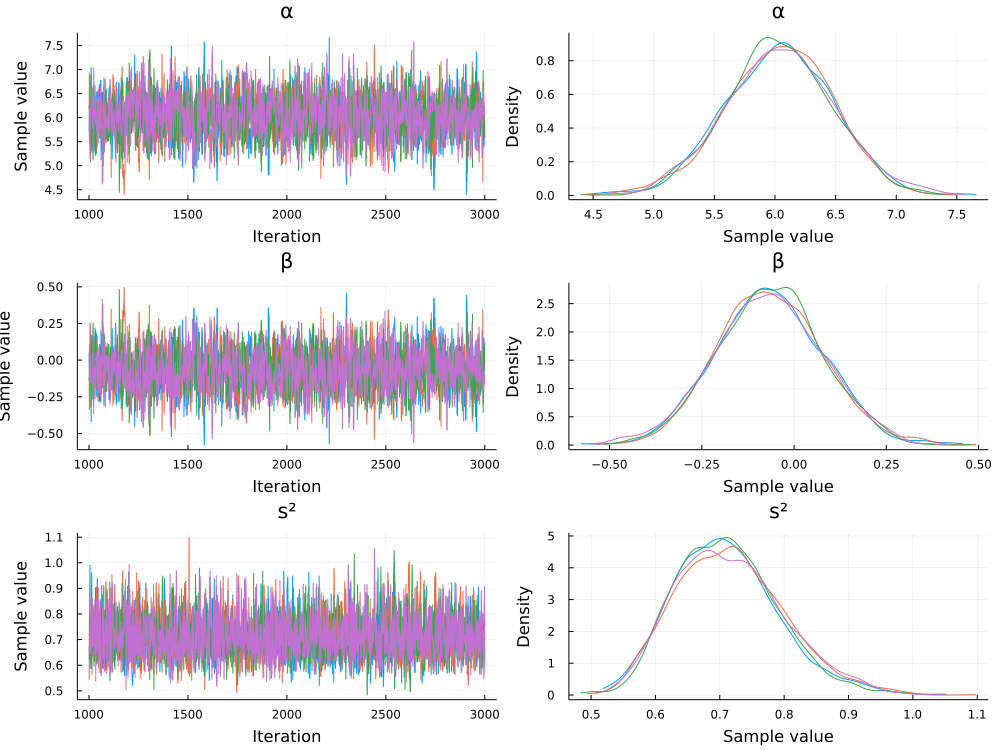

In [3]:
# Plot our chain
plot(chain)

Or maybe differential equations are more your speed?

In [ ]:
using DifferentialEquations

function lorenz!(du,u,p,t)
 du[1] = 10.0*(u[2]-u[1])
 du[2] = u[1]*(28.0-u[3]) - u[2]
 du[3] = u[1]*u[2] - (8/3)*u[3]
end

u0 = [1.0;0.0;2.0]
tspan = (0.0,100.0)
prob = ODEProblem(lorenz!,u0,tspan)
sol = solve(prob)

plot(sol,vars=(1,2,3))

# Installing Julia

- This workshop will be using the current long-term support (LTS) version of Julia, **1.6.5**
- Binaries on the website ([julialang.org/downloads/](https://julialang.org/downloads/))
    - **WINDOWS**: If you see a check box saying "Add to path" or something equivalent, check that. It'll help, I promise.
- For the lazy, [jill](https://github.com/abelsiqueira/jill)
- Let's take a moment to install Julia!

# How to edit Julia files

- Julia code is just text files (most code is!)
- You have options for a text editor:
    - VS Code (the more contemporary, common one, good support)
    - vim (medium nerds)
    - emacs (huge nerds with big pinkies)
    - Jupyter (more interactive programming)
- I will be working in VS Code to make it easy for everyone, but you may choose your own editor if you have one

# Installing VS Code

- Download VS Code ([https://code.visualstudio.com/download](https://code.visualstudio.com/download))
- Install the Julia extension
- Make a folder somewhere on your machine for this workshop!
- Open the folder you made in VS Code -- `File > Open Folder` or using the command pallette `Ctrl + Shift + P > Open Folder`

# Your first Julia program (maybe)

Everyone's first program in a new language is often "Hello World".

A hello world script is intended to 

- let you know _real quick_ whether or not your setup is working
- to show you the basics of how to make the code you wrote tell your computer what to do

# Your first Julia program

Make a file called `hello-world.jl`. 

The shortcut for this in VS Code is `Ctrl + N` -- this will open a new buffer, but no filename will be assigned until you save it (using `Ctrl + S`).

# Your first Julia program

Type the following in your script:

```julia
println("Hello World!")
```

# Running your first Julia program

Now we're going to run this. You have several options, depending on whether you are an interactive person or an old-school type (like me).

- Interactive way is to move your cursor to a line an hit 
    - `Ctrl + Enter` to execute the line your cursor is on (or a selection)
    - `Shift + Enter` to do the above, but also move down one line.
- Old-school way 
    1. Open a terminal
    2. Nagivate to your folder using `cd`
    3. Type `julia hello-world.jl`
    - Old-school notes
        - VS Code has a terminal buffer you can open with `Ctrl + ` (the symbol is the backtick, in the top-left of your keyboard)
        - You can use your system terminal if you know how.


# If it went well

You should see the words `Hello world!` printed to your display!

**CHECK IN!** Please reach out in the chat if anything broke or is not working.

# Going forward

You can run your code however you like -- I will be running some code here in a Jupyter notebook.

During concept checks, I will make a separate file for each problem to make sure you can see how I work in a live-code environment.

Or, you can just dump it all in one file! Go with what works for you.

# Questions?

# Julia basics

Let's get into the language!

# Variables

The natural place to start is with a __variable__.

A variable in Julia is a symbol we bind/assign a value to.

```julia
# Assign the value of 2 to a variable x
x = 2

println(x + 2) # Should print out "4" to your display

# Do some math, then update the value of x
x = 5 + 8
println(x) # Should display 13

# Put a word into y
y = "howdy partner"
```

In [ ]:
# More with variables
x1 = 15
red5 = 91
hats = 2
mapsie = -1
tuba = 9

answer = (x1 + red5) ^ hats * (mapsie/tuba)
println(answer)

# Variable conventions

- We typically use snake case in Julia (`long_variable_name` instead of `longVariableName`)
- Variables start with a letter, underscore, or a handful of Unicode characters
- `const x = 5` defines a constant variable, more on this later, but helpful if you know what that means.

# Concept check!

Don't run these yet -- try to run them in your head first. What are the values of `c` and `x4`?

## Q1

```julia
a = 3
b = a + 1
c = b * a
println(c)
```

## Q2

```julia
x1 = 6
x2 = x1 / 2
x4 = x3 + x2
println(x4)
```

# Primitive types

Julia has a handful of **primitive types**. Primitive types are variable types that are core to computing, things like

- Booleans (`true/false`)
- Integers, `Int` or `UInt` for unsigned (positive integers only)
    - Comes in `Int8/Int16/Int32/Int64/Int128` sizes
- Floating point (decimals), `Float16/Float32/Float64` for different precision
- Arbitrary size constructs (very expensive, probably not needed)
    - `BigInt`
    - `BigFloat`

# Primitive types

- Strings & characters
    - Quotes indicate a string (`String`), i.e. `"hello world"`
    - Apostrophes denote a single character (`Char`), i.e. `'c'`
- `Complex` numbers are supported natively, written `1 + 2im`
- `Rational` numbers are supported with double slashes, `2 // 3`

In [ ]:
typeof(5)

In [ ]:
typeof(5.0)

In [ ]:
typeof(true)

In [ ]:
typeof("howdy!")

In [ ]:
typeof('h')

# Arithmatic operators

All the common operators are supported!

![](https://user-images.githubusercontent.com/422990/148709622-4bf18e9c-b8ce-4332-a3ec-f45731f49238.png)

# Concept check!

1. Define a variable called `z`. Put any numeric type in here -- float or int.
2. Print out the remainder of `z` with the quotients (`2`, `4`, and `8`).
3. Tinker around and see what happens when you change the value of `z` and rerun the code.

# Boolean operators

Boolean algebra is how we work with `true` and `false` values. Julia supports all the common operators.

- `!true` is __negation__
- `x && y` means __and__. Returns `true` if `x` and `y` are both `true`, otherwise `false`.
- `x || y` means __or__. Returns `true` if `x` or `y` is `true`, otherwise `false`.
- All the bitwise operators. I won't cover these but they're [here](https://docs.julialang.org/en/v1/manual/mathematical-operations/#Bitwise-Operators).


# Comparison operators

Comparison operators are how you get a `true` or `false` value out of any kind of comparison.

- Equality: `x == y` returns `true` if `x` and `y` have the same value.
- Inequality: `x != y` returns `true` if `x` and `y` are __NOT__ the same.
- Less than: `x < y` returns `true` if `x` is __LESS__ than `y`.
- Greater than: `x > y` returns `true` if `x` is __GREATER__ than `y`.
    - Less than or greater than using equality are written `<=` or `>=`.

# Concept check!

`if` statements are a way of conditionally evaluating code (more on this later). For example, you can write

```julia
some_number = 16
if some_number >= 15
    println("It's larger than 15")
end
```

1. Make two variables, `var_a` and `var_b`. Put any numeric types in these variables.
2. Print out `"It's complicated"` if `var_a` is greater than 1 or `var_b` is not less than 2.
3. Try tinkering around with composing nots, ands, ors, and less thans if you complete step 2. You can put parentheses around stuff to enforce order of operations.

# Questions?

# Fun with Functions

Functions are how we write significantly more complex code. 

In Julia, functions are a _fantastic_ way to get free speed! Write in functions when you can.

A function is a construct accepting some number of inputs that returns some number of outputs -- think of it as copy-pasted code which you only write once. 

If you find yourself copy-pasting code two or more times, you should probably write a function instead.

The most common function definition is

```julia
function f(x, y)
    x + y
end
```

There is also a shorter way of defining functions:

```julia
f(x, y) = x + y
```

Functions are "called", which means that we provide the __inputs__ to the function, Julia will evaluate the function using those inputs, and __return__ whatever it has been asked to return.

Let's try this with a simple polynomial function.

In [ ]:
# Creating the function.
function poly(x, y)
    return 3x^2 + 2y^2 - 1*x*y
end

Note that we've only _defined_ the function -- it is only a recipe for what to do when the function is _called_ with some inputs `x` and `y`.

Calling the function is easy:

In [ ]:
poly(1, 2.5)

# Concept check!

Consider a standard polynomial of degree 4:

$$
g(x) = \theta_1 x^3 + \theta_2 x^2 + \theta_3 x + \theta_4
$$

1. Write the polynomial function `g` that accepts a value $x$, but also the four coefficients $\theta_1, \dots, \theta_4$.
2. Write a second function `h` that accepts _only_ a value `x`, but evaluates `g` at the coefficients `4`, `-3`, `2`, and `10`.

Recall that function syntax is

```julia
function f(args...)
    ...
end

# Alternatively:
f(args...) = ...
```

# Type annotations

We will talk a LOT about the type system today, but I want to introduce you to the idea that you can restrict your function to certain types of inputs by adding `::TypeName` after an argument:

In [ ]:
afun(x::Int) = x + 1
afun(x::Float64) = x / 2

This is an example of _multiple dispatch_, one of Julia's more wonderful features. See how the return value is different based on the input?

In [ ]:
afun(1) # This is calling afun with an Int type

In [ ]:
afun(1.0) # Calling with a `Float64` type

# What is `return`?

`return` can be read as

> Exit the function immediately! Give whatever called the function the thing to the right of `return`.

For example:

```julia
function aces(x)
    if x > 5
        # This exits the function immediately!
        return x + 5
        
        # Note that this occurs AFTER the return statement.
        # This line will NEVER run.
        println(x - 9)
    end
    
    # If x <= 5, this line will run instead.
    return x / 5
end
```

# Default return value

If you don't write `return` at the end of a function, it will return the value of the last line.

```julia
function noreturn(a)
    b = a % 2
    
    b # equivalent to writing return b in this case
end
```

To see how this can change, look at the case where we only ever get `a` back:

```julia
function noreturn(a)
    b = a % 2
    
    b # This line now means nothing, it is not the last line in the function
    a
end
```

You can return whatever you want! 

If you separate your returned values with commas, you can get multiple values out of a function.

In [ ]:
twovals(a,b) = a*b, a/b, a+b, a-b

In [ ]:
twovals(1,2)

# Tuples

You may have noted that the return value of `twovals` has parentheses around it -- this is called a __tuple__. 

We can extract values from the tuple using bracket notation:

```julia
a_tuple = (5, 10, 15)
a_tuple[1] # this is 5
a_tuple[3] # this is 15
```

A tuple is

- Immutable (can't change it, i.e. `x=(1,2,3); x[1] = 4` will throw an error)
- Ordered
- Fixed-length

We can _unpack_ a tuple by writing assigning variables on the left in the same shape as the tuple.

For example, with the tuple `(15, "red", 8)`, we can assign `a=15`, `b="red"`, and `c=8`.

In [ ]:
a,b,c = (15, "red", 8)

println(c)

# Named tuples

You can also give names to each position of a named tuple -- `NamedTuples` are amazing and I will talk a lot more about them in the performant Julia workshop.

Here's a brief intro:

In [ ]:
namedtup = (thing1 = 'a', thing2 = 15, thing3 = [10,9,8])

In [ ]:
namedtup.thing2

# Concept check!

Write a function that accepts one argument. 

- If the argument is _positive_, return twice that argument AND the string `"positive"`.
- If the argument is _negative_, return the __square__ of that argument AND the string `"negative"`. 
- If the argument is _zero_, return zero AND the string `"zero"`. 

# Keywords

You can allow functions to accept a _keyword_ argument, which is an argument you must specify by name when you call the function.

Keyword arguments occur after a semicolon in the function definition:

In [ ]:
f(x; coef = 2.0) = x * coef

We have assigned a default value to `coef`, so the following will work:

In [ ]:
f(2)

Because we've specified a keyword argument, we can also override `coef` if we want another value than `2`:

In [ ]:
f(2; coef=10)

# Questions?

# Array types

Alright, we're all mathy people. We work with data, and that means we typically have lots and lots of numbers. 

Let's get some practice with how Julia thinks about vectors, matrices, and arrays!

# Array types

Vectors are created by surrounding some values with brackets `([1,2,3])` and separating the values with commas.

```julia
vector_var = [5,10,19]
```

Rectangular arrays have values within a row separated by __spaces__ and new columns indicated with a __semicolon__.

```julia
matrix_var = [1 2 3; 4 5 6]
```

# Adding values to arrays

You can expand arrays using `push!(vector, thing)`. 

The `!` at the end of the function name has no effect as far as Julia's compiler is concerned -- it is only a social convention to indicate that the function _mutates_ or _changes_ the input.

In [ ]:
xs = [5,6,7]
push!(xs, 10)

println(xs)

# Convenience functions

- `length(xs)` tells you how long `xs` is. More useful for vector types.
- `size(xs)` tells you the size of `xs` in a tuple -- one entry for each dimension. More useful for multidimensional array types.
- `zeros(N)` gives you a vector of zeros of length `N`. You can make it multidimensional by adding more arguments, i.e. `zeros(n1, n2, n3)` will provide a 3d array.
    - `ones(args...)` is the same but with ones instead of zeros
    - By default the type of `zeros(n)` is `Vector{Float64}`, but you can set it to something else: `zeros(Int, 5)` is all integers.
- `rand(n)` is random uniform values
- `randn(n)` is random values from a standard Normal.

# Extracting values from arrays

We extract the value of an array using brackets:

```julia
xs = [50, 100, 150]
println(xs[1]) # this will print 50
```

For multidimensional arrays, it's the common notation separated by commas:

```julia
M = [10 11 12; 20 21 22]
M[2,2] # This is 21
```

# Getting ranges of values

We can get slices of data from array types using colons.

- `xs[5:end]` extracts the values of `xs` from index `5` all the way to the end of the vector. `end` is a special word here -- you may be used to using something like `xs[5:length(x)]`, which you can do, but Julia makes it easy.
- `xs[:,1]` grabs all values of column `1`.
- `xs[1,:]` grabs all values of row `1`.

# Setting ranges of values

Everything above allows you to _set_ values instead by putting an equal sign to the right of the indexing operation.

In [ ]:
xs = zeros(5)

xs[1] = 3
xs[2:3] = [4,4.5]
xs[4:end] = [1.0, 2.0]

xs

# `map`

`map` is a super common paradigm in many languages. It is how you apply a function to a set of inputs.

The syntax is `map(function_name, things_to_input)`.

`things_to_input` can be a lot of things:

- Iterators, `map(f, 1:5)` returns `[f(1), f(2), f(3), f(4), f(4)]`.
- Vectors, `map(f, [1,2,3,4,5])`
- Ordered sets, dictionaries, etc. More on these later.

In [ ]:
xs = [5, 10, 11]
doubler(input) = 2*input

map(doubler, xs)

In [ ]:
map(doubler, 10:20)

# Multiple input functions and `map`

`map` only works with single-input functions -- if you have a function with multiple inputs, you'll need to either define a function that accepts one input, or write an __anonymous function__.

An anonymous function looks like

```julia
x -> 2 * x
```

In the context of `map`, our `doubler` function from above could be rewritten as

In [ ]:
xs = [5, 10, 11]

map(x -> 2*x, xs)

# Multiple inputs

Anonymous functions are super useful when you want to `map` for functions with a lot of inputs. 

In [ ]:
two_input_function(x, y) = x^2 / y

map(m -> two_input_function(m, 3), [1,2,3,4])

# Broadcasting

If you come from other languages, you might be used to trying real hard to _vectorize_ your functions for performance. 

Julia makes this hilariously easy using __dot syntax__. Adding a dot between the function name and Julia will essentially call `map` on your behalf.

In [ ]:
a = [1.0,2.0,3.0]

In [ ]:
sin.(a)

# Concept check!

We'll need a new package for this one. Go to your REPL and type `] add UnicodePlots`.

We're going to plot a function we define:

```julia
function quadratic(x)
    return x^2
end
```

Create two variables:

1. `xs`, representing the _range_ of this function from -10 to 10.
2. `ys`, representing the _domain_ of this function evaluated using `xs`.

Both `map` and dot syntax should get you here.

Plot the quadratic function using the code

```julia
using UnicodePlots
display(lineplot(xs, ys))
```

# Control flow

Julia supports the standard control flow constructs:

- Conditional evaluation: `if`, `elseif`, and `else`
- Loops: `for` and `while`
    - `continue` (skip the current iteration) 
    - `break` (exit loop)
- `try`/`catch`/`finally` for error handling


# Conditional evaluation

The format for if/else blocks in Julia is

```julia
if thing
    . . . # Runs if thing == true
elseif another_thing
    . . . # Runs if thing == false and another_thing == true
elseif another_thing2
    . . . # Runs if thing == false, another_thing == false, another_thing2 == true
else
    . . . # Runs if all above are false
end
```

# Loops: the `for` loop

`for` loops in `Julia` have two bits in them.

```julia
for i in [1,2,3,4,5]
    println(i)
end
```

The two parts are:

- `[1,2,3,4,5]`, an "iterable" value. We want to loop through 1, then 2, then 3, and so on.
- `i`, which is new variable that will take on the values in `[1,2,3,4,5]` as the code in the loop is evaluated.

# Loops

You can put lots of things on the right-hand side of the loop:

- Ranges of numbers: `for i in 1:10`
- Strings: `for character in "howdy partner"`
- Dictionaries: `for pair in Dict(:a => 1, :b => 2)`
    - You can also unpack in a loop! Try `for (key, value) in Dict(:a => 1, :b => 2)`

# Concept check!

Let's do some **times tables**!

Write me a function that does the following:

- Accepts `n`, which is the maximum value of a times table. 
- Returns an `n` by `n` array where the entries of the array are the product of the indices of that array.

I.e. for `n=5`, I want to see a $5 \times 5$ matrix where the `[3,2]` entry is `3 * 2 = 6`. 

For the math-types, the formulation is this:

$$
M(n) = \begin{bmatrix}
1 & 2 & 3 & \dots & n \\
2 & 4 & 6 & \dots & 2n \\
3 & 6 & 9 & \dots & 3n \\
\vdots & & & & \\
n & \dots & & & n^2
\end{bmatrix}
$$

The value of $M(n)_{ij} = i\times j$.

In [ ]:
function times_table(n)
    M = zeros(Int, n, n)
    
    for i in 1:n
        for j in 1:n
            M[i,j] = i * j
        end
    end
    
    return M
end

times_table(5)

# The `while` loop

A `while` loop, unlike the `for` loop, is more commonly thought of as one where you do not know ahead of time how long your loop is going to run.

In [ ]:
x = 100
while x > 1
    println(x)
    x = x / 2
end


# Why use them?

`while` loops are a lot more common in systems programming, web services, etc. 

In research computing we tend to know how much data we have at every point in the program, so `while` loops are just not as common.

Doesn't mean they aren't useful! `while` loops are an excellent tool for optimizing an objective to within a tolerance, or doing something __until a quantity of interest converges__.

For example, we might be looking for a value $V^n(x)$ until $G(V^n(x)) \le \epsilon$.

```julia 
value = 0
epsilon = 1e-8

while loss_function(value) >= epsilon
    . . . # Do some mathy stuff
    value = new_value
end
```

# `break` and `continue`

Julia (like many languages) supports early skipping/termination of loops.

`break` exits the current loop:

In [ ]:
for i in 1:10
    println(i)
    break
end
    
println("all done")

`continue` goes to the next iteration (in a `for` loop) or back to the `while` condition:

In [ ]:
for i in 1:10
    # Skip even numbers
    if rem(i, 2) == 0
        continue
    end
    
    println(i)
end


I had a boss once who got mad at me for using `break` and `continue` in production code, because it makes it very difficult to read. 

He is right! They are not the best tools.

If you also have an annoyingly correct boss or care about your style, consider just using conditional evaluation:

In [ ]:
for i in 1:10
    if rem(i, 2) != 0
        println(i)
    end
end

# Exceptions

I am not going to teach you how to use `try`, `catch`, and `finally` here, because they are the world's greatest foot-gun if you don't understand them. 

I'll talk more about these in the __Performant Programming and Best Practices__ workshop.

If you understand them already, I want to familiarize you with the syntax:

In [ ]:
try 
    hats_are_a_dogs_best_friend(15, "red")
catch e # e here is the exception struct
    println(e)
finally # finally executes regardless of whether we fell into the catch block
    println("I did the work, boss")
end

# Linear algebra

Econs LOVE linear algebra for some reason (nerds) so I figured I had to show you how to use it.

Julia was originally intended to be a scientific computing language, so it comes with a very robust suite of linear algebra tools.

# Linear algebra functions

If you import the `LinearAlgebra` module, you'll get a bunch of handy tools:

- `inv` for matrix inversions
- `det` for determinant
- `tr` for trace
- `eigvals` and `eigvecs` for eigen values and vectors, respectively.
- `factorize` for more efficient representations of your matrix (upper, lower, diagonal, etc.)
- Many more [here](https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/).

# OLS

I imagine many people in the audience are familiar with the normal equations for OLS.

Consider the specification

$$
Y = X \beta + \epsilon
$$

We know that the least squares estimate of $\beta$ is 

$$
\hat\beta = (X'X)^{-1}X'Y
$$

Let's give it a shot.

In [ ]:
# Import the linear algebra functions.
using LinearAlgebra

# Create a 100x3 matrix of standard Gaussians
X = randn(100, 3)
X[:,1] = ones(size(X, 1)) # Add a constant column.

# Define coefficient: intercept, coef on column 2, coef on column 3.
β = [5.0, 2.0, -1.5]
Y = X*β + randn(size(X, 1)); # The semicolon at the end prevents this line from displaying

In [ ]:
# Matrix squaring
X'X

In [ ]:
# OLS normal equations
β_hat = inv(X'X)X'Y

In [ ]:
# Making predictions using β_hat
Y_hat = X*β_hat

# Calculating the SSE
e = Y_hat - Y
sse = e'e

# Concept check!

Let's do something cool -- let's roll our own little estimator that spits out (a) the coefficient estimates, (b) the variance covariance matrix of beta hat, and (c) t-stats (against null $\beta_k=0 \forall k$) for the coefficient estimator.

Recall that

\begin{align*}
\hat \beta &= (X'X)^{-1}X'Y \\
s^2 &= \frac{(\hat Y - Y)'(\hat Y - Y)}{n - K} \\
\Sigma^\text{SE} &= s^2 (X'X)^{-1} \\ 
t_k &= \frac{\hat\beta_k - \beta_k}{\Sigma^\text{SE}_{kk}}
\end{align*}

for number of observations $n$ and number of variables $K$. You can get `n, K = size(X)`.

I will put bare-bones code that only has the coefficient estimates in the chat!

In [ ]:
# Create a 100x3 matrix of standard Gaussians
X = randn(100, 3)
X[:,1] = ones(size(X, 1)) # Add a constant column.

# Define coefficient: intercept, coef on column 2, coef on column 3.
β = [5.0, 2.0, -1.5]
Y = X*β + randn(size(X, 1)); # The semicolon at the end prevents this line from displaying

# Expand this function to return
# 1. beta_hat
# 2. the variance covariance matrix of beta_hat
# 3. t-stats for beta_hat
function ols(X, Y)
    beta_hat = inv(X'X)X'Y
end

ols(X, Y)

In [ ]:
# An answer key
function ols(X, Y)
    beta_hat = inv(X'X)X'Y
    Y_hat = X*beta_hat
    e = Y_hat - Y
    
    n = size(X, 1)
    K = size(X, 2)
    
    s2 = e'e / (n-K)
    sigma_se = s2 * inv(X'X)
    t = beta_hat ./ diag(sigma_se)
    
    return beta_hat, sigma_se, t
end

beta_hat, sigma_se, t = ols(X, Y)

# Questions?

# Types

Julia does not have "objects" like you might be familiar with in R or Python. 

Julia has types. Everything in Julia has a type that may be a subtype of something else.

You can actually have long chains of types. For example, the subgraph of types for `Int64` is

In [ ]:
# This line actually returns true/false -- the <: operator says "left is a subtype of right"
Int64 <: Signed <: Integer <: Real <: Number <: Any

# Type annotations

You will often see code like `thing::NameOfType`. 

This is how you tell Julia's compiler `thing` should be of type `NameOfType` or a descendant of `NameOfType`. A shorthand operator for this is `typeof(thing) <: NameOfType`. If this does not evaluate to true, Julia will get mad at you.

In [ ]:
"howdy"::String

In [ ]:
# Errors because typeof(1) is Int64, not Float64
1::Float64

In [ ]:
# Real is a more general type, so you won't get an error here:
1::Real

# Type annotations

You can use type annotations to explicitly say what you think a type should be. In idiomatic Julia, it's not really common to do so outside of 

1. The argument types, i.e. 

```julia
f(x::Int, y::Float64) = ...
```

2. The return value:

```julia
f(x::Float64, y::Float64) = (x+y)::Float64
```

In case 2, the compiler is typically able to infer the type of `(x+y)` without you needing to do the annotation. 

My recommendation? Keep type annotations to a **minimum**!

# Abstract types

The core atom of Julia's type system is called an __abstract type__.

An abstract type tells us about the _class of behaviors_ we should expect.

In the case of integers, we know that `Integer` is an abstract type telling us that, whatever subtype we get (signed, unsigned, 8/16/32/64/128 bits, etc.), we can do all the things with the values that we do with other integers.

Let me cook up an example for you to see how this works.

# Abstract types & structs

Abstract types cannot be __instantiated__, meaning we can't ever create them. They are just a way for us to organize the types we have.

The things we _can_ instantiate are called __structs__. A struct is a wrapper around some fields. These are also known as _composite types_, _records_, and sometimes _objects_.

Here is an example of how we might define a struct (with no supertype).

In [ ]:
struct SomeStuff
    field::Float64
end

some_stuff = SomeStuff(0.5)

In [ ]:
some_stuff.field

Now, let me show you how we can combine __structs__ (things we can actually make) and __abstract types__ (concepts that organize our structs).

I'm going to wrap these types in a `module`, which you can think of as a little library of types and functions that serve a specific purpose.

In [ ]:
module VehicleTypes

# Our top level type
abstract type MobilityDevice end

# Subtypes for car/bicycle
abstract type Car <: MobilityDevice end
abstract type Bicycle <: MobilityDevice end

# Subtypes for car
struct Combustion <: Car 
    gallons::Float64
    mpg::Float64
end
struct Electric <: Car 
    emiles::Int64
end

# Subtypes for bicycle
struct Road <: Bicycle
    purchase_cost::Float64
end
struct Mountain <: Bicycle
    maintenance_cost::Float64
end

# Make our types available outside the module
export Electric, Combustion, 
    Road, Mountain, 
    Car, Bicycle, 
    MobilityDevice

end

In [ ]:
# Import the types we just made
using Main.VehicleTypes

Now let's _instantiate_ some of the structs we made (`Electric`, `Combustion`, `Road`, `Mountain`)

In [ ]:
electric_car = Electric(225.0)
ice_car = Combustion(11.0, 21.0) # just shy of an 11 gallon tank
fast_bike = Road(1500.99)
cool_bike = Mountain(49.99)

In [ ]:
# Which ones move?
moves(thing::MobilityDevice) = true
moves(thing) = false # this is equivalent to moves(thing::Any)

map(moves, [electric_car, ice_car, fast_bike, cool_bike, "hats"])

In [ ]:
# Check which ones are human powered
human_powered(thing::Car) = false
human_powered(thing::Bicycle) = true

map(human_powered, [electric_car, ice_car, fast_bike, cool_bike])

In [ ]:
# How far can we go?
distance_avail(thing::Electric) = thing.emiles
distance_avail(thing::Combustion) = thing.gallons * thing.mpg

map(distance_avail, [electric_car, ice_car])

In [ ]:
# Which car should I buy, using only distance as my criteria?
function which_car(cars::Vector{<:Car})
    distances = map(distance_avail, cars)
    dist, position = findmax(distances)
    return cars[position]
end

cars = [
    Combustion(10, 15),
    Combustion(13, 12),
    Combustion(11, 32),
    Electric(222),
    Electric(224),
    Electric(312)
]

In [ ]:
# Let's call it! What car should I buy?
best_car = which_car(cars)

# Multiple dispatch

Everything I've done above is an example of __multiple dispatch__. We defined a hierarchy of types, and defined functions that

1. Operated differently on different types
2. Operated differently at different _levels_ of types

Multiple dispatch turns out to be an amazing tool -- you can define different functions for different inputs that use the same name!

# Questions?

# Data input/output (I/O)

The common way to get data into Julia is using CSV files, but you can import basically any data file (.dta, .mat, .b7dat, etc.)

I'll show you how to import data with the package `CSV`.

First, we need to install it! I'll have you install `DataFrames` too, while we're at it.

Access the REPL and type `] add CSV DataFrames`.

I've made a demo `.csv` file which you can download from here:

https://raw.githubusercontent.com/cpfiffer/julia-bootcamp-2022/main/session-1/example.csv

You can do this in Julia with

In [ ]:
import Downloads
Downloads.download(
    "https://raw.githubusercontent.com/cpfiffer/julia-bootcamp-2022/main/session-1/example.csv",
    "example.csv"
)

Now let's get our data into Julia!

In [ ]:
using CSV, DataFrames

df = DataFrame(CSV.File("example.csv"))

## Data frames

All languages we're used to have a construct for some kind of rectangular/tabular data.

In Julia, we have a very popular package called `DataFrames` that emulates this construct. 

Using our data from above, we can do all kinds of fun things:


In [ ]:
# Get a single column
df.name
df[:, :name] # is equivalent

In [ ]:
# Get several columns
df[:, [:name, :attribute]]

In [ ]:
# Can also use select:
select(df, [:name, :attribute])

In [ ]:
# Get a row
df[1, :]

In [ ]:
# Get several rows
df[1:2, :]

In [ ]:
# Get rows for which a condition is true
df[df.awesomeness .>= 3, :]

In [ ]:
# Get hat owners
df[df.owns_hat, :]

In [ ]:
# Side note, we can also use filter here:
filter(x -> x.owns_hat, df)

In [ ]:
# Using groupby to get average wealth by hat ownership
using Statistics # to get the mean function
group = groupby(df, :owns_hat)
combine(group, :wealth => mean, :awesomeness => mean, :awesomeness => std)

In [ ]:
# Make a second datafame with names & ids
name_df = DataFrame(
    name = ["jane", "emilio", "bojack"],
    id = ["J876-A", "E993-B", "B261-L"]
)

# Left join
leftjoin(df, name_df, on=:name)

In [ ]:
# Right join
rightjoin(df, name_df, on=:name)

In [ ]:
# Inner joins
innerjoin(df, name_df, on=:name)

In [ ]:
# Outer joins
outerjoin(df, name_df, on=:name)

# Questions?

# Visualization

Julia has a _really_ good visualization ecosystem. 

Major packages:
- Plots.jl (everything)
- UnicodePlots.jl (quick-and-dirty text plots)
- Makie.jl (for complex, GPU-enabled stuff)

I'll focus on `Plots` and `StatsPlots`, both of which are (currently) the most commonly used in Julia.

Install them with `] add Plots StatsPlots`.

Here's a quick example of how to do a basic plot!

In [ ]:
using Plots

xs = 0:0.1:15
ys = sin.(xs)

plot(xs, ys)

In [ ]:
# We can add titles/legends/colors/etc. with keywords:
plot(xs, ys, color=:red, title="A plot", label="series 1")

In [ ]:
# We can plot multiple series on top of each other
ys1 = sin.(xs)
ys2 = cos.(xs)

plot(xs, ys1)
plot!(xs, ys2) # note the !, which means "modify something"

In [ ]:
# lots of types of plots:
plot(
    scatter(xs, ys1),
    plot(xs, ys1),
    
)

In [ ]:
# Overlay two different plot types on top of each other!
plot(xs, ys1)
scatter!(xs, ys1)

In [ ]:
# StatsPlots allows the use of densities
using StatsPlots

draws = randn(1000)

plot(
    density(draws),
    histogram(draws)
)


In [ ]:
# Plots with marginals!
using Distributions, StatsPlots
dist = MvNormal([0,0], [1.0 0.5; 0.5 2.0])
draws = rand(dist, 1000)

scatter(draws[1,:], draws[2,:])

In [ ]:
marginalkde(draws[1,:], draws[2,:])

In [ ]:
# Plots with marginals!
using Distributions, StatsPlots
dist = MvNormal(
    [0,0,0], 
    [
         1.0 0.5 -0.2; 
         0.5 2.0  0.0;
        -0.2 0.0 4.0
    ])
draws = rand(dist, 1000)

scatter3d(draws[1,:], draws[2,:], draws[3,:], alpha=0.5)

# Questions?

Next up is the project!

# Project time

For the individual project today, I want us to do something very simple that should help you figure out how to work with multiple dispatch in a Julian way.

We are going to write an `ols` function that allows you to optionally request bootstrapped standard errors!

# Bootstrapping

Bootstrapping is a simple statistical procedure that happens to be computationally fun. If you already know how to do this in other languages, feel free to glaze over here.

Otherwise, here's the framework. Let's begin with a simple linear model:

$$
Y = X \beta + \epsilon, \quad \epsilon \sim N(0, \Sigma)
$$

A simple form for $\Sigma$, often called spherical or homoscedastic errors, has

$$
\Sigma = \begin{bmatrix}
\sigma^2 & 0        & \dots \\
0        & \sigma^2 &       \\
\vdots   &          & \ddots \\ 
\end{bmatrix} = \sigma^2 I
$$

## Spherical errors

Consider the OLS estimator 

$$
\hat\beta = (X'X)^{-1}X'Y
$$

we know that assuming spherical standard errors here yields

$$
\text{Var}[\hat\beta \mid X] = \sigma^2 (X'X)^{-1}
$$

where we can estimate $\sigma^2$ with $s^2$:

$$
s^2 = \frac{(\hat Y - Y)'(\hat Y - Y)}{n - K}
$$

## Bootstrapping

If we don't really want to make this assumption, or we don't want to do the math to get the variance structure of our estimator, we can just bootstrap it! (don't @ me if you are mad about this, ain't no amazing econometrician)

The bootstrapping procedure goes something like this:

1. Estimate $\hat \beta$ $T$ times, with different subsamples. For each $t$ in $1,\dots,T$:
    1. Sample $m$ data points from $X$ and $Y$ with replacement. Denote these $X_t$ and $Y_t$.
    2. Estimate $\hat\beta_t$ using the resampled $(X_t, Y_t)$.
2. Calculate the final estimates and their standard errors as

\begin{align*}
    \hat\beta &= \frac1T \sum_{t}^T \hat\beta_t \\ 
    SE(\hat\beta) &= \frac{1}{\sqrt{T}} \sqrt{\text{diag}\bigg(\sum_{t}^T (\hat\beta_t - \hat \beta)(\hat\beta_t - \hat \beta)' \bigg)}
\end{align*}

# Minor helpful note
 
You can very easily extract repeated values from an array.

This is really, really useful for sampling with replacement.

In [ ]:
# Repeated indexing
x = ['a', 'b', 'c', 'd', 'e']
inds = [1,1,2]

x[inds]

And here's how you might actually sample values with replacement from an array:

In [ ]:
# Or, drawing random indexes with replacement:
inds = rand(1:length(x), 3)
x[inds]

# Project

Your goal for the project is to start with the following code:

```julia
using LinearAlgebra, Statistics

n = 100
x = [ones(n) rand(1:0.1:10, n)]
b, sigma = [2.5, -1.2], 1
y = x*b + sigma .* randn(n);
```

Next, I want you to write the code to make the following work:

```julia
ols(x, y, Spherical()) # returns OLS estimates + spherical standard errors
ols(x, y, Bootstrapped(10000, 10)) # Bootstrapped estimates with T=10,000, subsample size m = 10
```

You will need to define `struct`s for `Spherical` and for `Boostrapped`! Signatures for the above might start

```julia
function ols(x, y, est::Spherical)
    . . .
end

function ols(x, y, est::Boostrapped)
    . . .
end
```

### Bonus tasks

Here's some extra stuff to do if you want more of a challenge or you have extra time. You'll need to do some research!

1. Wrap up your estimates from `ols` in a `DataFrame`. You'll need to add this to your environment with `] add DataFrames` and put `using DataFrames` at the top of your script.
2. Try to parallelize your bootstrapping procedure! Could be challenging but I'm happy to help. Useful tools are
    - `Threads.@threads for thing in ...`
        - Will require the use of a lock (I recommend `SpinLock`)! Reach out to me if you want to see how this works.
    - `ThreadsX.map(z -> beta_hat(x, y, rand(1:length(y), m), 1:T)` requires that you run `]add ThreadsX` first and put `using ThreadsX` at the top of your script.
3. Modify your code to plot the distribution of bootstrapped beta estimates, using `UnicodePlots.density` or `Plots.density`. Could be more interesting if you change the error distribution to something more interesting, like `exp.(randn(n))`.
4. Try implementing the above but with instrumental variables! You will need to modify your underlying data a little to support this.

    To do this you'll need to add support for the instrumentation matrix $Z$. Recall that the beta estimator for 2SLS is

    \begin{align*}
    \hat \beta^{2SLS} &= (X'Z(Z'Z)^{-1}Z'X)^{-1}X'Z(Z'Z)^{-1}Z'Y \\
    \text{Var}\big[\hat \beta^{2SLS}\big] &= \sigma^2 (X'Z(Z'Z)^{-1}Z'X)^{-1}
    \end{align*}